# Домашнее задание по Машинному Обучению
## Работу выполнил: Дурандин Владимир Евгеньевич 3825М1ПМвм1

# Описание зачаи
Построить модель машинного обучения для предсказания рыночной стоимости компьютера (целевая переменная Price) на основе его технических характеристик. Так как целевая переменная является непрерывной, решается задача регрессии. Метрики качества: **MAE** (средняя абсолютная ошибка) и $R^2$ (коэффициент детерминации).


### Описание данных

| Название столбца | Описание |
| :--- | :--- |
| **device_type** | Тип устройства (Ноутбук или Настольный ПК) |
| **brand** | Бренд производителя компьютера |
| **model** | Конкретная модель устройства |
| **release_year** | Год выпуска |
| **os** | Операционная система |
| **form_factor** | Форм-фактор (используется для доп. информации о корпусе) |
| **cpu_brand** | Производитель процессора (CPU) |
| **cpu_model** | Модель процессора |
| **cpu_tier** | Уровень производительности процессора (Tier) |
| **cpu_cores** | Количество ядер процессора |
| **cpu_threads** | Количество потоков процессора |
| **cpu_base_ghz** | Базовая тактовая частота процессора |
| **cpu_boost_ghz** | Максимальная (Boost) частота процессора |
| **gpu_brand** | Производитель видеокарты (GPU) |
| **gpu_model** | Модель видеокарты |
| **gpu_tier** | Уровень производительности видеокарты |
| **vram_gb** | Объем видеопамяти (VRAM) в ГБ |
| **ram_gb** | Объем оперативной памяти (RAM) в ГБ |
| **storage_type** | Тип накопителя (SSD, HDD и т.д.) |
| **storage_gb** | Объем накопителя в ГБ |
| **storage_drive_count** | Количество установленных накопителей |
| **display_type** | Тип экрана |
| **display_size_in** | Размер диагонали экрана в дюймах |
| **resolution** | Разрешение экрана |
| **refresh_hz** | Частота обновления экрана в Гц |
| **battery_wh** | Емкость аккумулятора в Вт·ч (для ноутбуков) |
| **charger_watts** | Мощность зарядного устройства в Вт |
| **psu_watts** | Мощность блока питания в Вт (для ПК) |
| **wifi** | Тип/стандарт Wi-Fi |
| **bluetooth** | Версия Bluetooth |
| **weight_kg** | Вес устройства в кг |
| **warranty_months** | Срок гарантии в месяцах |
| **price** | Цена (Целевая переменная) |

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

import kagglehub
import os

try:

    df = pd.read_csv('all-computer-prices.csv')
except:
    path = kagglehub.dataset_download("paperxd/all-computer-prices")
    print("Path to the folder with the dataset:", path)

    csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
    df = pd.read_csv(os.path.join(path, csv_file))

print(f"Размер датасета: {df.shape}")
df.head()

Using Colab cache for faster access to the 'all-computer-prices' dataset.
Path to the folder with the dataset: /kaggle/input/all-computer-prices
Размер датасета: (100000, 33)


,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  cpu_base_ghz         100000 non-null  float64
 12  cpu_boost_ghz        100000 non-null  float64
 13  gpu_brand            100000 non-null  object 
 14  gpu_model            100000 non-null  object 
 15  gpu_tier          

# Разведочный анализ данных (EDA)
Необходимо понять, от чего зависит цена. Также нужно найти лишние столбцы. Столбец model часто уникален для каждой строки. Если его оставить, модель просто "выучит" цены наизусть, но не сможет предсказывать новые ноутбуки.

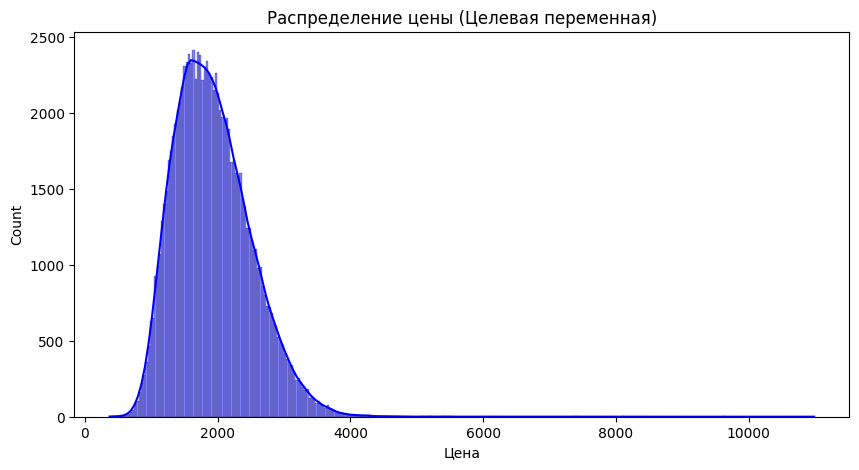

Средняя цена: 1928.76
Медианная цена: 1863.99


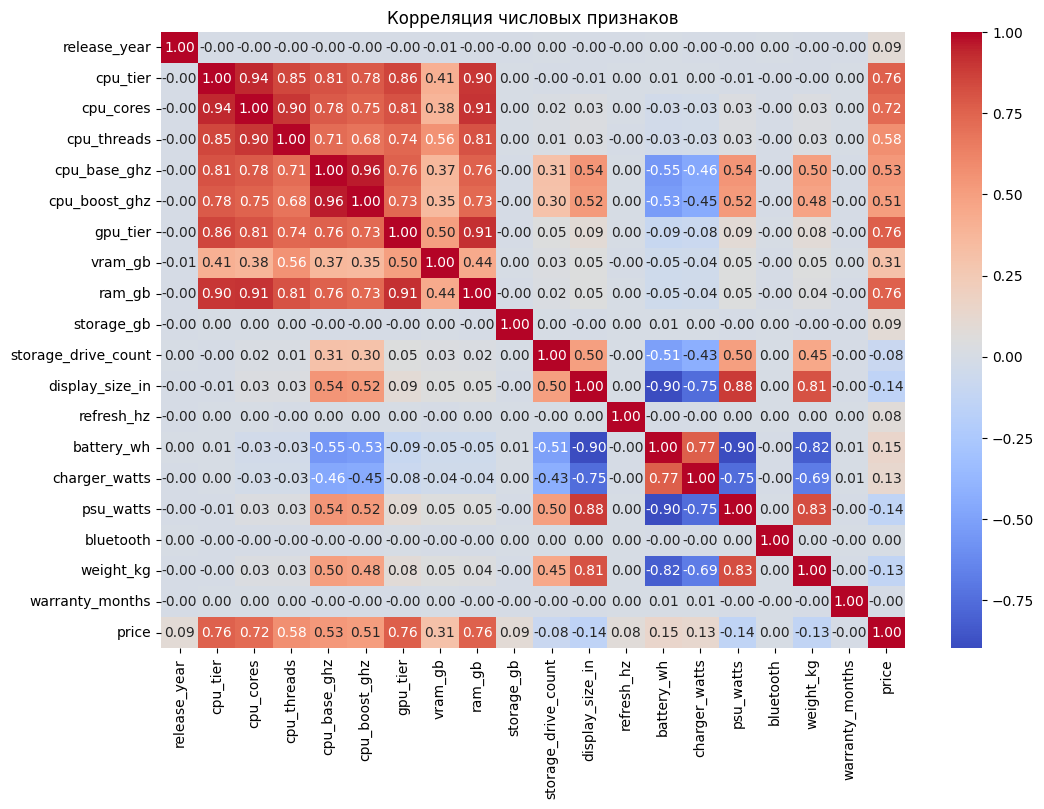

In [20]:
# 'model' слишком специфична, это почти ID. Необходимо удалить, чтобы избежать переобучения.
cols_to_drop = ['model']
df_clean = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

plt.figure(figsize=(10, 5))
sns.histplot(df_clean['price'], kde=True, color='blue')
plt.title('Распределение цены (Целевая переменная)')
plt.xlabel('Цена')
plt.show()

print(f"Средняя цена: {df_clean['price'].mean():.2f}")
print(f"Медианная цена: {df_clean['price'].median():.2f}")

# Корреляционная матрица (для числовых признаков)
plt.figure(figsize=(12, 8))
numeric_df = df_clean.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляция числовых признаков')
plt.show()



# Обработка пропущенных значений

In [21]:
missing = df_clean.isna().sum()
print("Пропущенные значения:\n", missing[missing > 0])

if missing.sum() > 0:
    df_clean = df_clean.dropna()
    print("Пропуски удалены.")
else:
    print("Пропусков нет.")

Пропущенные значения:
 Series([], dtype: int64)
Пропусков нет.


# Обработка категориальных признаков

Так как признаков много, используем **LabelEncoder** для компактности, вместо **One-Hot Encoding**, но в **KNN** будет низкая точность.

In [22]:
categorical_cols = df_clean.select_dtypes(include=['object']).columns

le_dict = {} # Сохраним энкодеры, чтобы знать, что есть что
for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    le_dict[col] = le

print("Категориальные признаки закодированы.")
df_clean.head()

Категориальные признаки закодированы.


,device_type,brand,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,cpu_threads,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,0,9,2022,2,1,2,17269,3,12,24,...,1,90,0,0,750,1,5.1,11.00,36,1383.99
1,1,9,2022,2,4,2,21727,4,12,24,...,0,90,56,120,0,1,5.3,2.03,12,2274.99
2,0,6,2024,3,7,0,4826,2,8,16,...,4,120,0,0,850,1,5.0,7.00,24,1879.99
3,0,3,2024,2,1,0,6970,2,6,12,...,4,120,0,0,650,1,5.2,6.00,36,1331.99
4,1,4,2024,1,3,0,10023,5,16,32,...,2,90,80,90,0,1,5.2,1.50,12,2681.99


# Разбиение на обучающую и тестовую выборки


In [23]:
X = df_clean.drop('price', axis=1)
y = df_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нормализация выборки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Train shape: {X_train_scaled.shape}")
print(f"Test shape: {X_test_scaled.shape}")

Train shape: (80000, 31)
Test shape: (20000, 31)


# Запуск KNN Regressor и подбор гиперпараметров
> В качестве метрики ошибки будем использовать **MAE** (средняя абсолютная ошибка в деньгах)

K = 1
K = 2
K = 3
K = 4
K = 5
K = 6
K = 7
K = 8
K = 9
K = 10
K = 11
K = 12
K = 13
K = 14
K = 15
K = 16
K = 17
K = 18
K = 19
K = 20
K = 21
K = 22
K = 23
K = 24
K = 25
K = 26
K = 27
K = 28
K = 29
K = 30
K = 31
K = 32
K = 33
K = 34
K = 35
K = 36
K = 37
K = 38
K = 39


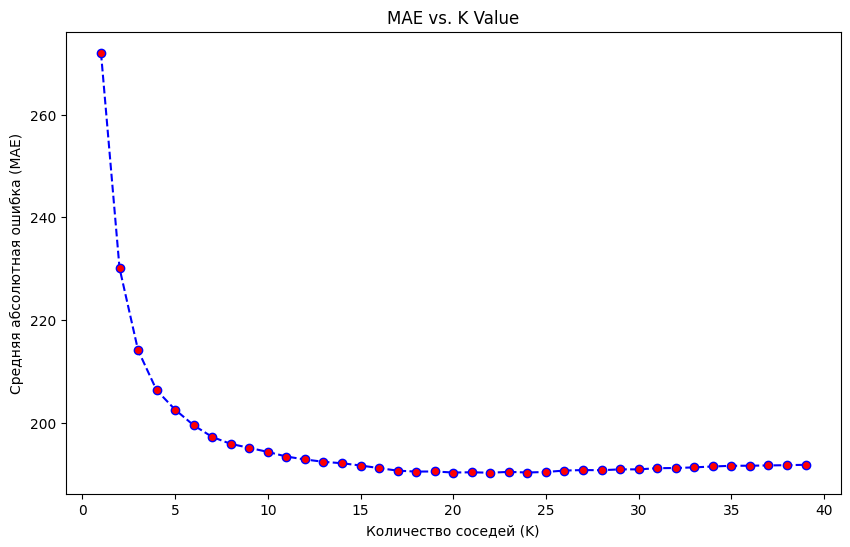

Лучшее количество соседей K: 22


In [24]:
error_rates = []
k_values = range(1, 40)

for k in k_values:
    print(f"K = {k}")
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred = knn.predict(X_test_scaled)

    error = mean_absolute_error(y_test, pred)
    error_rates.append(error)

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='blue', markerfacecolor='red')
plt.title('MAE vs. K Value')
plt.xlabel('Количество соседей (K)')
plt.ylabel('Средняя абсолютная ошибка (MAE)')
plt.show()

best_k = k_values[np.argmin(error_rates)]
print(f"Лучшее количество соседей K: {best_k}")

# Вычисление ошибок и выводы по KNN

=== Результаты KNN ===
MAE (Средняя ошибка в валюте): 190.23
RMSE (Корень из среднеквадратичной): 257.67
R2 Score (Точность 0..1): 0.7989


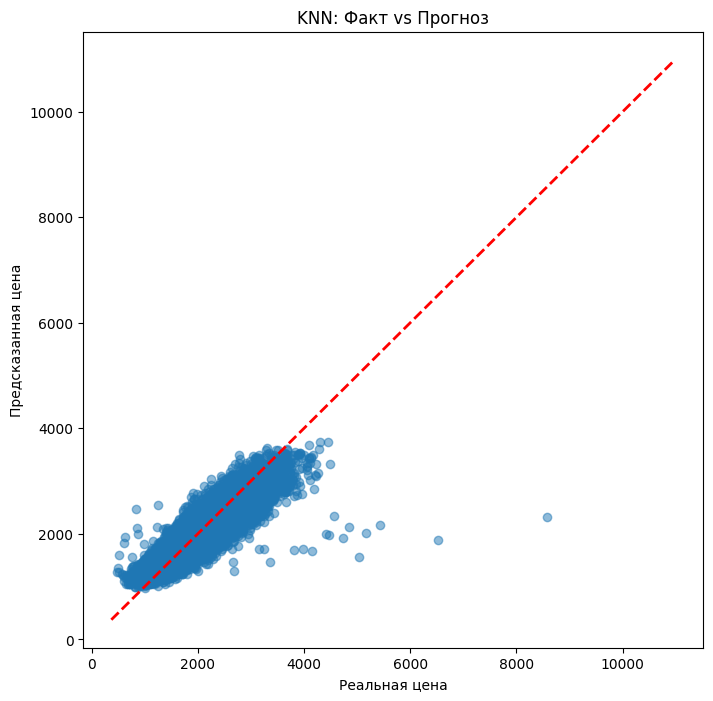

In [25]:
final_knn = KNeighborsRegressor(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
y_pred_knn = final_knn.predict(X_test_scaled)

print("=== Результаты KNN ===")
print(f"MAE (Средняя ошибка в валюте): {mean_absolute_error(y_test, y_pred_knn):.2f}")
print(f"RMSE (Корень из среднеквадратичной): {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.2f}")
print(f"R2 Score (Точность 0..1): {r2_score(y_test, y_pred_knn):.4f}")

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.title('KNN: Факт vs Прогноз')
plt.show()

=== Статистика по дорогим устройствам (Цена > 4000) ===
Всего устройств: 100000
Дорогих устройств: 183
Процент дорогих устройств: 0.18%


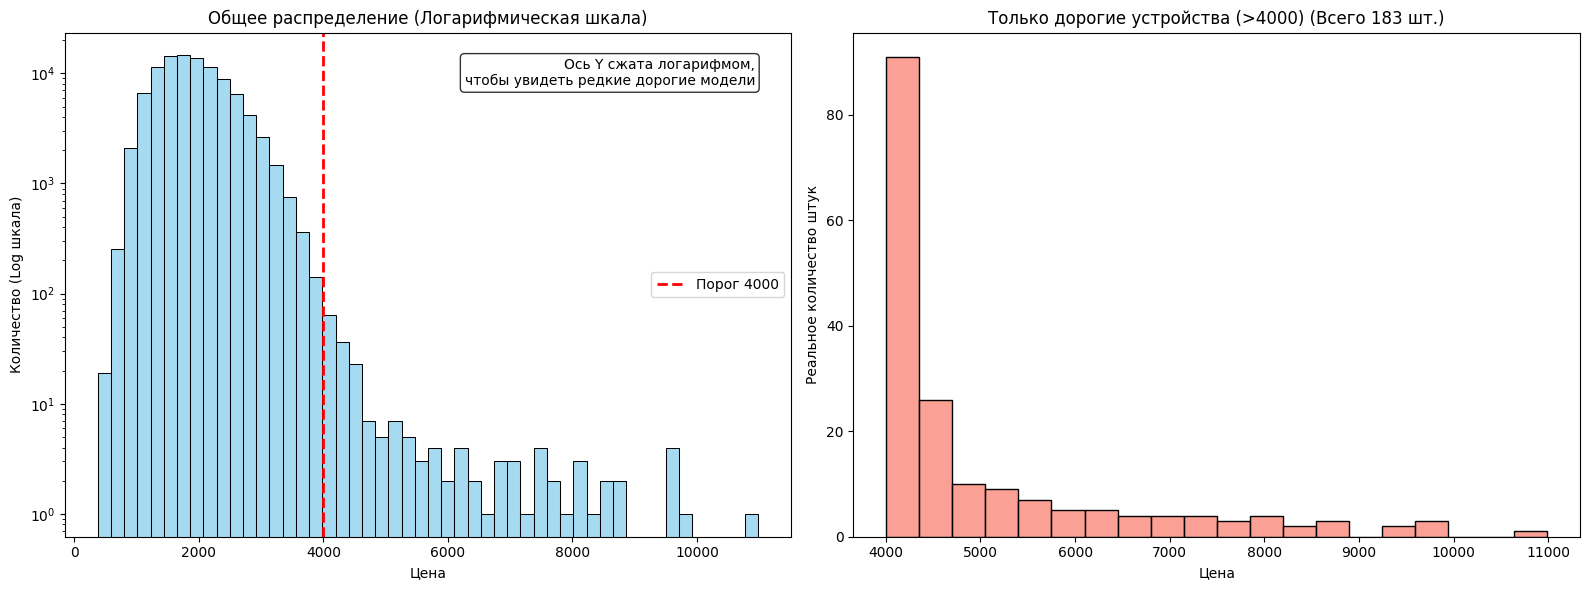

In [26]:
# Судя по графику, проблемы начинаются после 4000
threshold_price = 4000

total_count = len(y)
expensive_count = len(y[y > threshold_price])
expensive_percent = (expensive_count / total_count) * 100

print(f"=== Статистика по дорогим устройствам (Цена > {threshold_price}) ===")
print(f"Всего устройств: {total_count}")
print(f"Дорогих устройств: {expensive_count}")
print(f"Процент дорогих устройств: {expensive_percent:.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(y, bins=50, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_yscale('log')
axes[0].axvline(x=4000, color='red', linestyle='--', linewidth=2, label='Порог 4000')
axes[0].set_title('Общее распределение (Логарифмическая шкала)')
axes[0].set_xlabel('Цена')
axes[0].set_ylabel('Количество (Log шкала)')
axes[0].legend()

axes[0].text(0.95, 0.95, 'Ось Y сжата логарифмом,\nчтобы увидеть редкие дорогие модели',
             transform=axes[0].transAxes, ha='right', va='top', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

expensive_prices = y[y > 4000]
sns.histplot(expensive_prices, bins=20, ax=axes[1], color='salmon', edgecolor='black')
axes[1].set_title(f'Только дорогие устройства (>4000) (Всего {len(expensive_prices)} шт.)')
axes[1].set_xlabel('Цена')
axes[1].set_ylabel('Реальное количество штук')

plt.tight_layout()
plt.show()

> В ходе анализа выявлена системная ошибка: модель не может предсказать цену выше ~4000\$

> Причина в экстремальном дисбалансе данных. Устройства дороже 4000\$ составляют всего 0.18% от всего датасета (183 шт. из 100,000).

> Алгоритм **KNN** усредняет цену соседей. Из-за нехватки дорогих примеров в обучающей выборке, "соседями" дорогого компьютера неизбежно становятся более дешевые модели с похожими характеристиками, что тянет прогноз вниз.

### Попытка удалить выбросы

Порог отсечения цены: 3456.99
Удалено записей: 995

R2 Score (Без выбросов): 0.8088
Было R2 Score (С выбросами): 0.7989


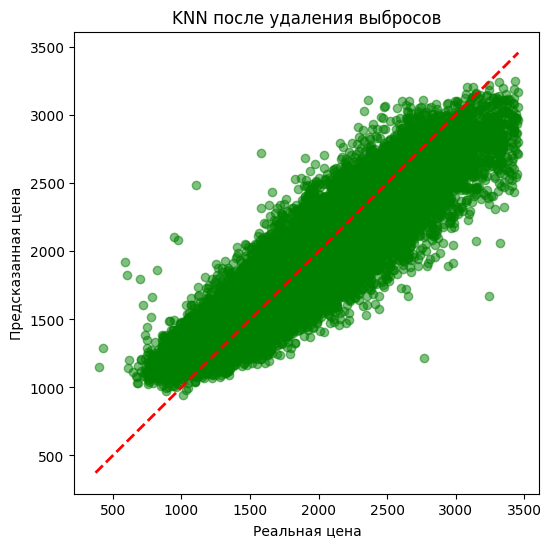

In [27]:
# Берем 99-й перцентиль (удаляем 1% самых дорогих)
limit = df_clean['price'].quantile(0.99)
df_no_outliers = df_clean[df_clean['price'] <= limit]

print(f"Порог отсечения цены: {limit:.2f}")
print(f"Удалено записей: {len(df_clean) - len(df_no_outliers)}")

X_new = df_no_outliers.drop('price', axis=1)
y_new = df_no_outliers['price']

X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

scaler_n = StandardScaler()
X_train_n_scaled = scaler_n.fit_transform(X_train_n)
X_test_n_scaled = scaler_n.transform(X_test_n)

knn_clean = KNeighborsRegressor(n_neighbors=best_k) # Берем тот же K
knn_clean.fit(X_train_n_scaled, y_train_n)
y_pred_n = knn_clean.predict(X_test_n_scaled)

print(f"\nR2 Score (Без выбросов): {r2_score(y_test_n, y_pred_n):.4f}")
print(f"Было R2 Score (С выбросами): {r2_score(y_test, y_pred_knn):.4f}")

plt.figure(figsize=(6, 6))
plt.scatter(y_test_n, y_pred_n, alpha=0.5, color='green')
plt.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], 'r--', lw=2)
plt.title('KNN после удаления выбросов')
plt.xlabel('Реальная цена')
plt.ylabel('Предсказанная цена')
plt.show()

Исключение из обучающей выборки верхний 1% самых дорогих устройств (цена > 3457\$) привело к устранению систематической ошибки, повышению точности (Коэффициент детерминации $R^2$ вырос до 0.81).

Ну и в целом, удаление небольшого количества аномально дорогих устройств (шума/выбросов) доказало, что алгоритм KNN отлично справляется с оценкой стоимости в массовом сегменте рынка (бюджетные и средние модели).

# Запуск других регрессоров

,Model,MAE,R2
3,Random Forest,160.052034,0.845220
1,Ridge Regression,181.542899,0.818499
0,Linear Regression,181.543203,0.818498
4,KNN (k=22),190.226427,0.798933
2,Decision Tree,233.089450,0.641156


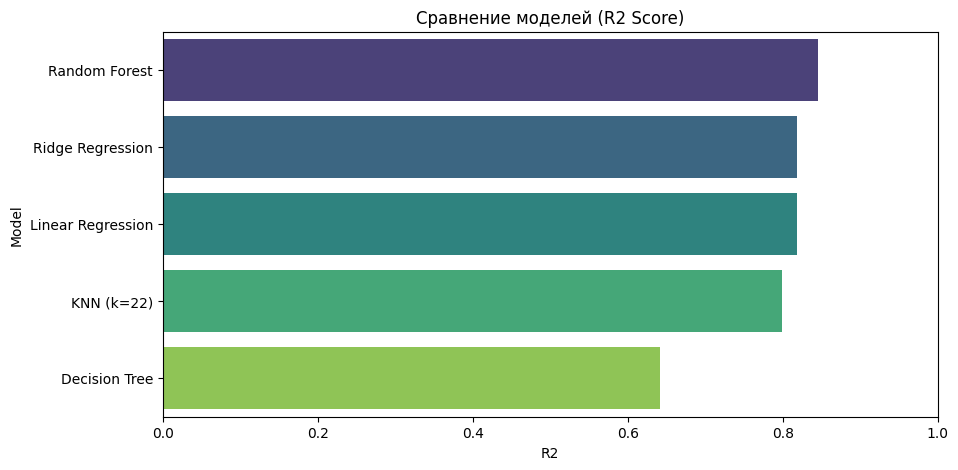

In [28]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    f"KNN (k={best_k})": KNeighborsRegressor(n_neighbors=best_k)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    results.append({'Model': name, 'MAE': mae, 'R2': r2})

results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
display(results_df)

plt.figure(figsize=(10, 5))
sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')
plt.title('Сравнение моделей (R2 Score)')
plt.xlim(0, 1)
plt.show()

Сравнение 5 моделей показало, что Random Forest является наилучшим алгоритмом для данной задачи ($R^2=0.85\$ $). Он превзошел базовый KNN ($R^2=0.80\$ $) и даже Линейную регрессию ($R^2=0.82\$ $), так как смог найти сложные нелинейные зависимости в характеристиках компьютеров. Одиночное Дерево решений показало худший результат из-за склонности к переобучению

# Борьба с несбалансированностью и удаление мультиколлинеарности

In [29]:
y_log = np.log1p(df_clean['price'])

X_all = df_clean.drop('price', axis=1)
corr_matrix = X_all.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Находим колонки с корреляцией > 0.95 (очень сильная связь)
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f"Удаляем коррелированные признаки: {to_drop}")

X_reduced = X_all.drop(columns=to_drop)

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_reduced, y_log, test_size=0.2, random_state=42)

scaler_log = StandardScaler()
X_train_log_scaled = scaler_log.fit_transform(X_train_log)
X_test_log_scaled = scaler_log.transform(X_test_log)

print(f"Размерность данных после чистки: {X_train_log_scaled.shape}")

Удаляем коррелированные признаки: ['cpu_boost_ghz', 'battery_wh']
Размерность данных после чистки: (80000, 29)


=== Результаты обучения на Log(Price) без коррелированных признаков ===
Linear Regression: R2 = 0.8121, MAE = 183.6
Ridge Regression: R2 = 0.8121, MAE = 183.6
Decision Tree: R2 = 0.6336, MAE = 233.2
Random Forest: R2 = 0.8527, MAE = 157.7
KNN (k=22): R2 = 0.7951, MAE = 190.9


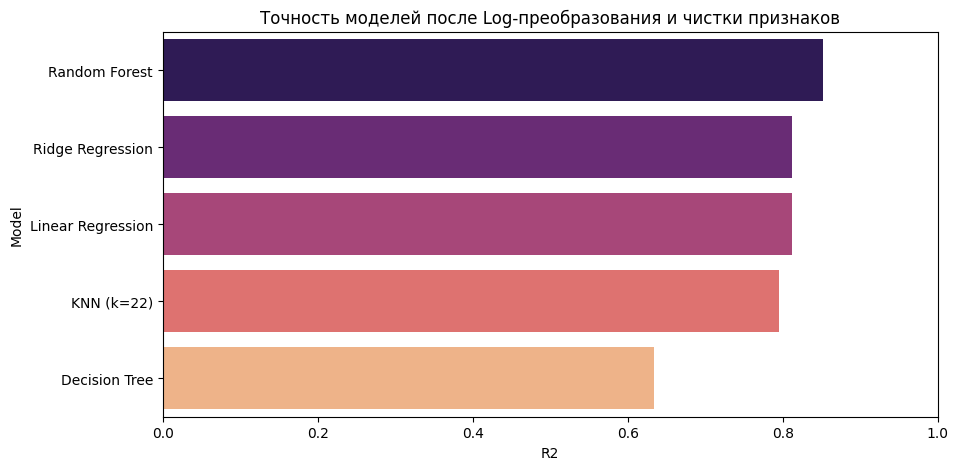

,Model,MAE,R2
3,Random Forest,157.698480,0.852682
1,Ridge Regression,183.581316,0.812084
0,Linear Regression,183.582369,0.812081
4,KNN (k=22),190.863217,0.795103
2,Decision Tree,233.201100,0.633568


In [30]:
results_log = []

print("=== Результаты обучения на Log(Price) без коррелированных признаков ===")

for name, model in models.items():

    model.fit(X_train_log_scaled, y_train_log)


    pred_log = model.predict(X_test_log_scaled)

    y_test_real = np.expm1(y_test_log)
    pred_real = np.expm1(pred_log)

    mae = mean_absolute_error(y_test_real, pred_real)
    r2 = r2_score(y_test_real, pred_real)

    results_log.append({'Model': name, 'MAE': mae, 'R2': r2})
    print(f"{name}: R2 = {r2:.4f}, MAE = {mae:.1f}")

results_log_df = pd.DataFrame(results_log).sort_values(by='R2', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='R2', y='Model', data=results_log_df, palette='magma')
plt.title('Точность моделей после Log-преобразования и чистки признаков')
plt.xlim(0, 1.0)
plt.show()

display(results_log_df)

---
# Итоговые выводы:



1.   Целью работы было построение модели машинного обучения для предсказания стоимости компьютеров (*Price*) на основе их технических характеристик. Так как целевая переменная непрерывна, решалась задача регрессии.
2.   Разведочный анализ данных (EDA) и Предобработка:
      *   Удалены идентификаторы (ex. model), приводящие к переобучению.
      *   Выявлен сильный дисбаланс данных ("длинный хвост"). Устройства дороже 4000\$. составляют менее 0.2% выборки. Это вызывало проблему, при которой базовые модели не могли предсказывать высокие цены.
      *   Обнаружена мультиколлинеарность (дублирование информации) между признаками процессора, памяти и накопителей. Для повышения устойчивости линейных моделей сильно коррелированные признаки были исключены.
      *   Для решения проблемы аномалий и улучшения качества обучения было применено логарифмирование целевой переменной `log(Price)`.
3.   Было протестировано 5 алгоритмов регрессии. Результаты на тестовой выборке (после оптимизации):
| Модель | R² Score | MAE (ошибка в $) |
| :--- | :--- | :--- |
| **Random Forest** | **0.8527** | **157.7** |
| Ridge Regression | 0.8121 | 183.6 |
| Linear Regression | 0.8121 | 183.6 |
| KNN (k=22) | 0.7951 | 190.9 |
| Decision Tree | 0.6490 | 231.7 |

4.   Ключевые наблюдения:
  
  Random Forest показал наилучший результат ($R^2 > 0.85\$ $). Он успешно уловил нелинейные зависимости между комплектующими и ценой, а также лучше других справился с прогнозированием в широком диапазоне цен благодаря логарифмированию данных.

  Простая линейная регрессия показала высокий результат ($R^2 \approx 0.81\$ $), что говорит о том, что ценообразование в этом сегменте рынка достаточно предсказуемо и линейно зависит от характеристик (RAM, SSD, CPU).

  Decision Tree показало худший результат из-за склонности к переобучению, что подтверждает необходимость использования Random Forest.

  Метод ближайших соседей показал достойный результат, но уступил лидерам из-за высокой размерности данных.






